In [1]:

import os
os.chdir('/home/DISCOVER_summer2022/xusc/exp/Cerberus-main')
import sys
import numpy as np
import random
import math
from PIL import Image, ImageOps, ImageFilter

import torch
import torch.utils.data as data
import torchvision.transforms as transform
import re
from dataloaders.semantic_edge import get_edge_dataset
from loguru import logger 

from utils import * 



Bad key text.latex.preview in file /home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/DISCOVER_summer2022/xusc/.conda/envs/uav/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('s

In [2]:

#* for SBD :  -base-size 352 --crop-size 352 
#* for Cityscapes :  --base-size 640 --crop-size 640



input_transform = transform.Compose([
    transform.ToTensor(),
    transform.Normalize([.485, .456, .406], [.229, .224, .225])])

#* the meaning of scale : 'choose to use random scale transform(0.75-2),default:multi scale')
data_kwargs = {'transform': input_transform, 'base_size': 640,
                   'crop_size': 640, 'logger': logger,
                   'scale': True,
                   "root":'/home/DISCOVER_summer2022/xusc/exp/Cerberus-main/data/cityscapes/data_proc'}

trainset = get_edge_dataset('cityscapes', split='train', mode='train',
                                    **data_kwargs)




BaseDataset: base_size 640, crop_size 640


In [14]:
to_img = transform.ToPILImage()
ans = []
for idx in range(trainset.__len__()):
    img, mask = trainset.__getitem__(idx)
    # img = np.array(to_img(normalize(img)))
    ans.append(mask[0].unique().numpy().tolist())
    


In [16]:

#* what is the function of  mask[0]

# ans

In [19]:
len(ans)

cnt = 0 
for x in ans:
    if len(x) == 2 :

        cnt+=1

In [20]:
cnt

612

In [30]:
to_img = transform.ToPILImage()

for idx in range(trainset.__len__()):
    img, mask = trainset.__getitem__(idx)
    # img = np.array(to_img(normalize(img)))
    if len(mask[0].unique().numpy().tolist())==2:
        break
    break

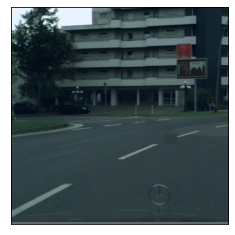

In [31]:
img = np.array(to_img(normalize(img)))
show_imgs([img],[0,0,0])


In [36]:
mask[0]

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

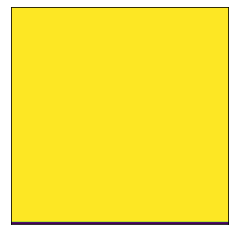

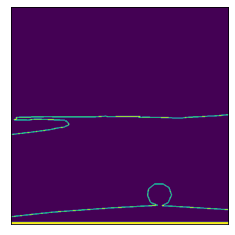

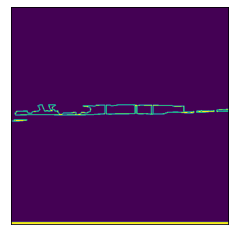

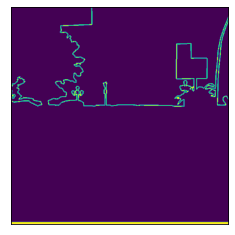

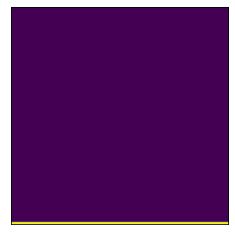

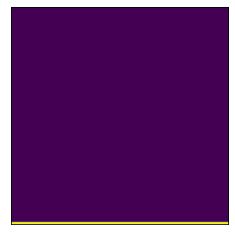

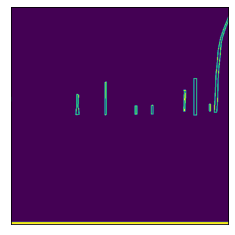

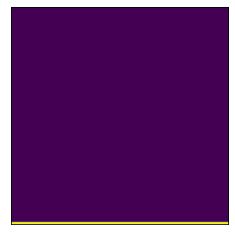

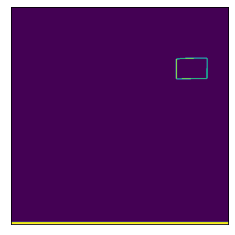

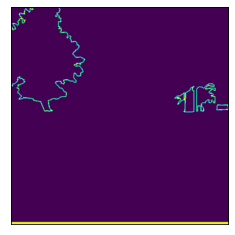

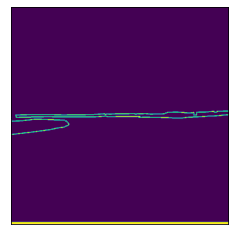

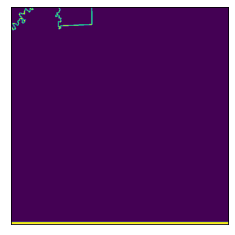

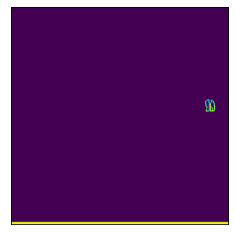

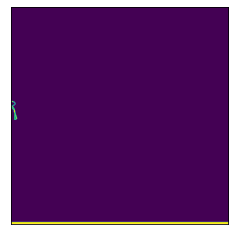

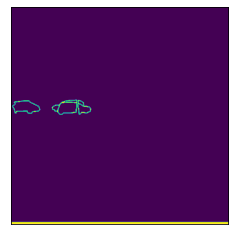

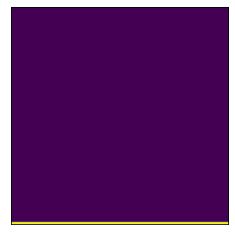

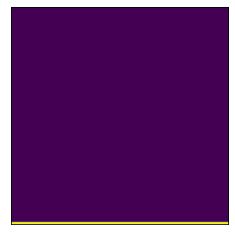

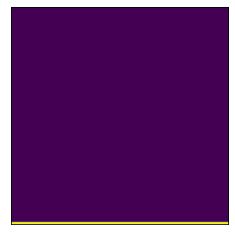

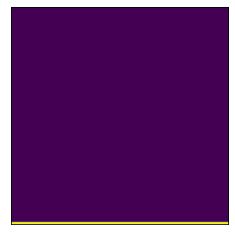

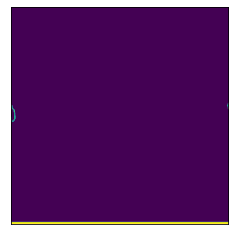

In [32]:
for m in mask:
    show_imgs([to_img(m)],[0])


## check input and output

In [11]:
from os.path import join,split,exists
path = "/home/DISCOVER_summer2022/xusc/exp/RINDNet-main"


image = np.load(join(path,'image.npy'))
label = np.load(join(path,'label.npy'))

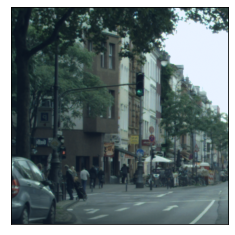

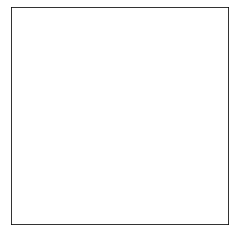

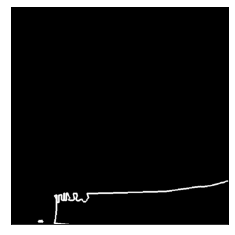

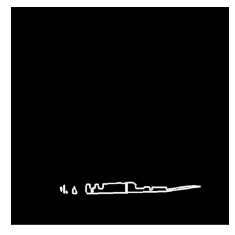

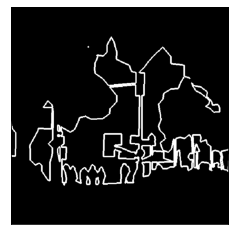

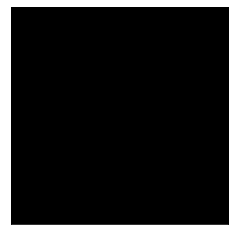

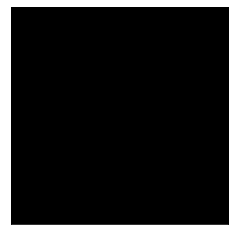

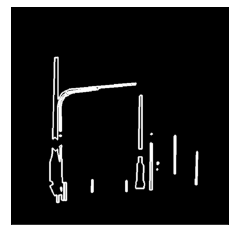

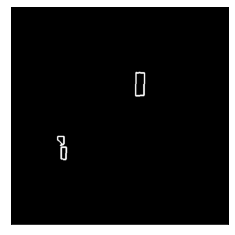

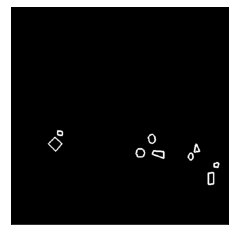

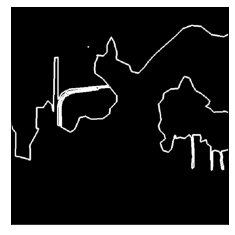

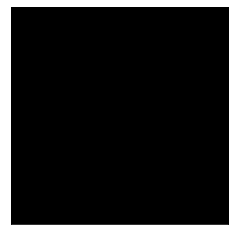

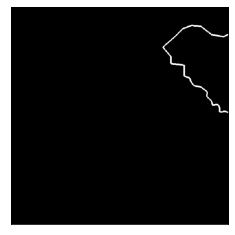

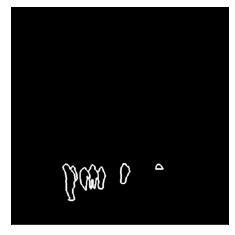

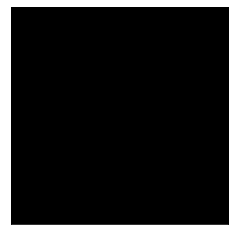

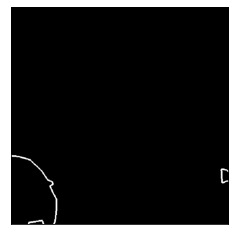

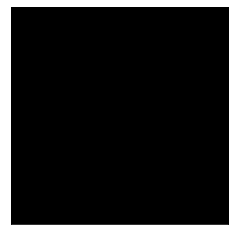

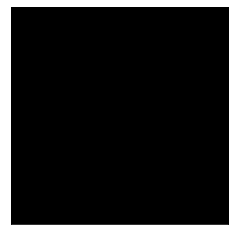

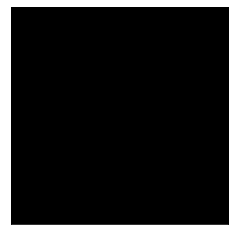

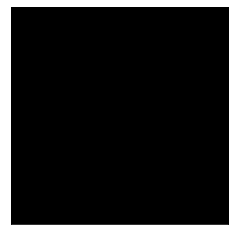

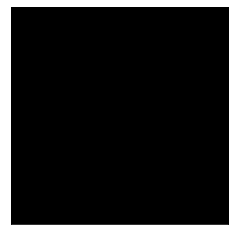

In [17]:
show_imgs([normalize(image)],[0])

for m in label:
    show_imgs([to_img(m*255)],[0])



array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.